# Econ 409 Homework #4
# Hayden Johnson

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import io
import matplotlib.lines as mlines
import statsmodels.formula.api as smf
import seaborn as sns
import math
import yfinance as yf

In [2]:
sp500 = yf.download("^GSPC", start="1987-07-24", end="2023-02-23", interval="1d")

sp500.index = pd.to_datetime(sp500.index).date

sp500

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
1987-07-24,307.820007,309.279999,307.779999,309.269989,309.269989,158400000
1987-07-27,309.299988,310.700012,308.609985,310.649994,310.649994,152000000
1987-07-28,310.649994,312.329987,310.279999,312.329987,312.329987,172600000
1987-07-29,312.339996,315.649994,311.730011,315.649994,315.649994,196200000
1987-07-30,315.690002,318.529999,315.649994,318.049988,318.049988,208000000
...,...,...,...,...,...,...
2023-02-15,4119.500000,4148.109863,4103.979980,4147.600098,4147.600098,4075980000
2023-02-16,4114.750000,4136.540039,4089.489990,4090.409912,4090.409912,4143660000
2023-02-17,4077.389893,4081.510010,4047.949951,4079.090088,4079.090088,4045480000
2023-02-21,4052.350098,4052.350098,3995.189941,3997.340088,3997.340088,4121590000


In [3]:
data = pd.read_excel('Bull_Bear_Spread.xlsx')

In [4]:
data

,Date,Close
0,1987-07-24 00:00:00,0.22
1,1987-07-31 00:00:00,0.00
2,1987-08-07 00:00:00,0.27
3,1987-08-14 00:00:00,0.25
4,1987-08-21 00:00:00,0.60
...,...,...
2050,Count '18,52.00
2051,Count '19,52.00
2052,Count '20,53.00
2053,Count '21,51.00


In [5]:
data = data[:1856]
data = data.rename({'Close': 'Sentiment'}, axis=1)

In [6]:
data
# assuming that the date column is named 'Date'
data = data.set_index('Date')
data.index = pd.to_datetime(data.index).date

In [7]:
data

,Sentiment
1987-07-24,0.220000
1987-07-31,0.000000
1987-08-07,0.270000
1987-08-14,0.250000
1987-08-21,0.600000
...,...
2023-01-26,-0.083094
2023-02-02,-0.046512
2023-02-09,0.125000
2023-02-16,0.052941


In [8]:
sp500 = sp500.reindex(data.index) # set index to match dates in data
sp500

,Open,High,Low,Close,Adj Close,Volume
1987-07-24,307.820007,309.279999,307.779999,309.269989,309.269989,1.584000e+08
1987-07-31,318.049988,318.850006,317.559998,318.660004,318.660004,1.819000e+08
1987-08-07,322.100006,324.149994,321.820007,323.000000,323.000000,2.127000e+08
1987-08-14,334.630005,336.079987,332.630005,333.989990,333.989990,1.961000e+08
1987-08-21,334.850006,336.369995,334.299988,335.899994,335.899994,1.896000e+08
...,...,...,...,...,...,...
2023-01-26,4036.080078,4061.570068,4013.290039,4060.429932,4060.429932,3.809590e+09
2023-02-02,4158.680176,4195.439941,4141.879883,4179.759766,4179.759766,5.624360e+09
2023-02-09,4144.250000,4156.229980,4069.669922,4081.500000,4081.500000,4.270200e+09
2023-02-16,4114.750000,4136.540039,4089.489990,4090.409912,4090.409912,4.143660e+09


In [9]:
sp500

,Open,High,Low,Close,Adj Close,Volume
1987-07-24,307.820007,309.279999,307.779999,309.269989,309.269989,1.584000e+08
1987-07-31,318.049988,318.850006,317.559998,318.660004,318.660004,1.819000e+08
1987-08-07,322.100006,324.149994,321.820007,323.000000,323.000000,2.127000e+08
1987-08-14,334.630005,336.079987,332.630005,333.989990,333.989990,1.961000e+08
1987-08-21,334.850006,336.369995,334.299988,335.899994,335.899994,1.896000e+08
...,...,...,...,...,...,...
2023-01-26,4036.080078,4061.570068,4013.290039,4060.429932,4060.429932,3.809590e+09
2023-02-02,4158.680176,4195.439941,4141.879883,4179.759766,4179.759766,5.624360e+09
2023-02-09,4144.250000,4156.229980,4069.669922,4081.500000,4081.500000,4.270200e+09
2023-02-16,4114.750000,4136.540039,4089.489990,4090.409912,4090.409912,4.143660e+09


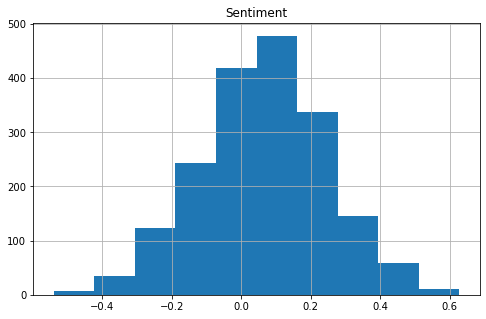

In [10]:
plt.figure(figsize = (8, 5))
plt.title("Sentiment")
plt.hist(data.Sentiment)
plt.grid()

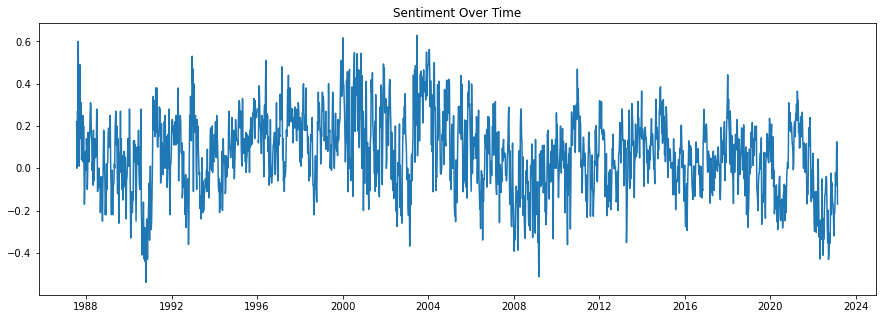

In [11]:
plt.figure(figsize = (15, 5))
plt.title("Sentiment Over Time")
plt.plot(data.Sentiment)
plt.show()

In [12]:
# merge Sentiment column from data to sp
sp500['Sentiment'] = data['Sentiment'].values
sp500 = sp500.ffill()
sp500

,Open,High,Low,Close,Adj Close,Volume,Sentiment
1987-07-24,307.820007,309.279999,307.779999,309.269989,309.269989,1.584000e+08,0.220000
1987-07-31,318.049988,318.850006,317.559998,318.660004,318.660004,1.819000e+08,0.000000
1987-08-07,322.100006,324.149994,321.820007,323.000000,323.000000,2.127000e+08,0.270000
1987-08-14,334.630005,336.079987,332.630005,333.989990,333.989990,1.961000e+08,0.250000
1987-08-21,334.850006,336.369995,334.299988,335.899994,335.899994,1.896000e+08,0.600000
...,...,...,...,...,...,...,...
2023-01-26,4036.080078,4061.570068,4013.290039,4060.429932,4060.429932,3.809590e+09,-0.083094
2023-02-02,4158.680176,4195.439941,4141.879883,4179.759766,4179.759766,5.624360e+09,-0.046512
2023-02-09,4144.250000,4156.229980,4069.669922,4081.500000,4081.500000,4.270200e+09,0.125000
2023-02-16,4114.750000,4136.540039,4089.489990,4090.409912,4090.409912,4.143660e+09,0.052941


# 1

**a)**

In [13]:
# Set the parameters for the contrarian strategy
k = 0.43
z = 1.645
T = 20

# Compute the filter error
sp500["Filter"] = sp500["Adj Close"].ewm(alpha=k, adjust=False).mean()
sp500["Filter Error"] = sp500["Adj Close"] - sp500["Filter"]

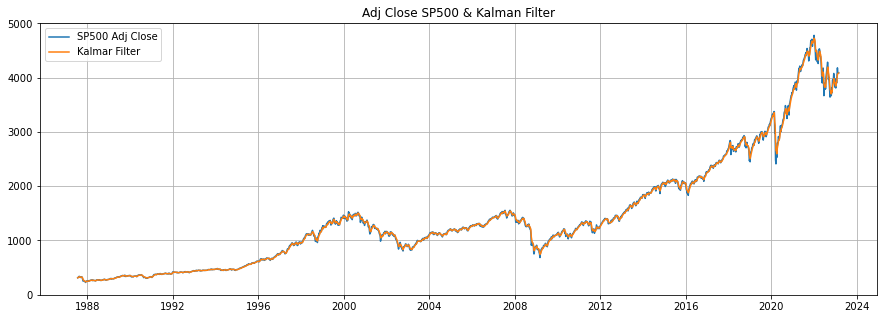

In [14]:
plt.figure(figsize = (15, 5))

plt.title("Adj Close SP500 & Kalman Filter")

#plotting the USDEURO interest rate differential
plt.plot(sp500['Adj Close'])
#plotting the Kalman Filter
plt.plot(sp500['Filter'])

#Creating an easily readable legend
plt.legend(["SP500 Adj Close", "Kalmar Filter"]) 
#plt.xlim([datetime.date(2022, 1, 1), datetime.date(2023, 1, 1)])
plt.grid()

In [15]:
int2 = sp500[["Adj Close", "Filter", "Filter Error", "Sentiment"]].copy()

# get the sample mean at each point in time using an expanding window
int2["E_bar"] = int2["Filter Error"].expanding(T).mean()

# get the sample mean at each point in time using a rolling window
int2["mu_t"] = int2["Filter Error"].rolling(T).mean()

# get the variance at each point in time using an expanding window
int2["var_t"] = int2["Filter Error"].expanding(T).std()

# calculate the test statistic
int2["Test Statistic"] = int2["mu_t"]/(int2["var_t"]/np.sqrt(T))

# create a new coluimn with a 0 default value
int2["Signal"] = 0
for i in int2.index:
    if (int2.loc[i, "Test Statistic"] < z) & (int2.loc[i, "E_bar"] >= 0) & (int2.loc[i, "Sentiment"] > 0):
        int2.loc[i, "Signal"] = -1
    elif (int2.loc[i, "Test Statistic"] > -z) & (int2.loc[i, "E_bar"] < 0) & (int2.loc[i, "Sentiment"] < 0):
        int2.loc[i, "Signal"] = 1


int2.dropna(inplace = True)
int2.head()

,Adj Close,Filter,Filter Error,Sentiment,E_bar,mu_t,var_t,Test Statistic,Signal
1987-12-04,223.919998,236.024836,-12.104838,-0.17,-4.854621,-4.854621,9.890268,-2.195140,0
1987-12-11,235.320007,235.721760,-0.401752,-0.09,-4.642579,-4.874708,9.688691,-2.250083,0
1987-12-18,249.160004,241.500205,7.659799,0.06,-4.083380,-4.759334,9.812246,-2.169166,0
1987-12-24,252.029999,246.028016,6.001983,0.08,-3.644886,-4.735465,9.814590,-2.157772,0
1987-12-31,247.080002,246.480370,0.599632,-0.01,-3.468031,-5.176150,9.637880,-2.401819,0


In [16]:
int2.Signal.value_counts()

 0    1255
-1     553
 1      29
Name: Signal, dtype: int64

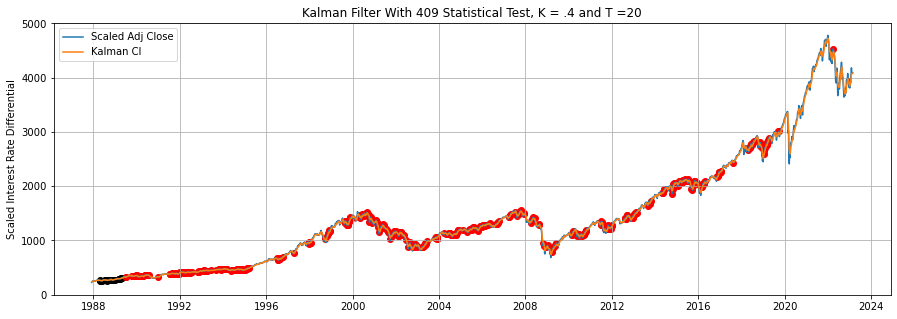

In [17]:
#interest2 = interest2[interest2.index.year >= 2017]
fig, ax = plt.subplots(figsize = (15, 5))
ax.set_title("Kalman Filter With 409 Statistical Test, K = .4 and T ="+str(T))

ax.set_ylabel("Scaled Interest Rate Differential")
ax.plot(int2["Adj Close"])
ax.plot(int2["Filter"])



ax.scatter(int2[int2.Signal == 1].index, int2[int2.Signal == 1]["Adj Close"], color = "black")
ax.scatter(int2[int2.Signal == -1].index, int2[int2.Signal == -1]["Adj Close"], color = "red")

ax.legend(["Scaled Adj Close", "Kalman CI"])


#plt.xlim([datetime.date(2022, 1, 1), datetime.date(2023, 1, 1)])
ax.grid()

In [18]:
# Create a dataframe at a daily frequency wiyh start and end 
# dates that cover the observation period
drange = pd.date_range(start =sp500.index[0], end = "2023-02-23")
daily  = pd.DataFrame(index = drange)

daily["Signal"] = int2["Signal"]

daily["Filter"] = int2["Filter"]

daily["Filter"] = daily["Filter"].ffill()

daily["Adj Close"] = int2["Adj Close"]
daily["Adj Close"] = daily["Adj Close"].ffill()
daily = daily.fillna(0)

i = 30
daily[str(i)+"_signal"] = 0
for j in daily.index:
    if daily.loc[j,"Signal"] != 0:
        daily.loc[j:j+datetime.timedelta(i), str(i)+"_signal"] = daily.loc[j, "Signal"]

In [19]:
drange = pd.date_range(start = data.index[0], end = "2023-02-23")
exdf = pd.DataFrame(index = drange)

exdf["Adj Close"] = sp500['Adj Close']
exdf["Adj Close"] = exdf["Adj Close"].ffill()

daily["Adj Close"] = exdf["Adj Close"]
daily["Returns"] = np.log(daily["Adj Close"]).diff()

In [20]:
s = i
daily[str(s)+"_returns"] = (np.exp((daily[str(i)+"_signal"].shift()*daily.Returns).cumsum())-1)

In [21]:
daily[str(s)+"_success"] = ((daily[daily.Signal!= 0][str(s)+"_returns"].diff()>0)*1).shift(-1)
daily.head()

,Signal,Filter,Adj Close,30_signal,Returns,30_returns,30_success
1987-07-24,0.0,0.0,309.269989,0,NaN,NaN,NaN
1987-07-25,0.0,0.0,309.269989,0,0.0,0.0,NaN
1987-07-26,0.0,0.0,309.269989,0,0.0,0.0,NaN
1987-07-27,0.0,0.0,309.269989,0,0.0,0.0,NaN
1987-07-28,0.0,0.0,309.269989,0,0.0,0.0,NaN


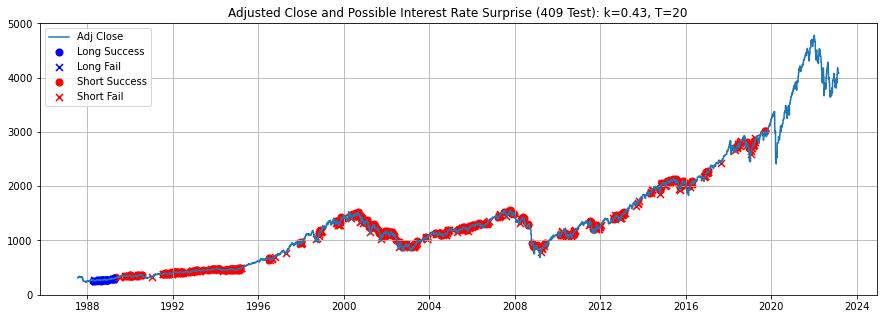

In [22]:
plt.figure(figsize = (15, 5))

plt.title("Adjusted Close and Possible Interest Rate Surprise (409 Test):"+ " k=" + str(k)+", T="+str(T))

plt.plot(daily["Adj Close"])

longsuccess = daily[(daily[str(s)+"_success"] == 1) & (daily["Signal"] == 1)]
longfail = daily[(daily[str(s)+"_success"] == 0) & (daily["Signal"] == 1)] 
shortsuccess = daily[(daily[str(s)+"_success"] == 1) & (daily["Signal"] == -1)]
shortfail = daily[(daily[str(s)+"_success"] == 0) & (daily["Signal"] == -1)]

plt.scatter(longsuccess.index, longsuccess["Adj Close"], color = 'blue', s = 50)
plt.scatter(longfail.index, longfail["Adj Close"], color = 'blue', s = 50, marker = "x")

plt.scatter(shortsuccess.index, shortsuccess["Adj Close"], color = 'red', s = 50)
plt.scatter(shortfail.index, shortfail["Adj Close"], color = 'red', s = 50, marker = "x")

plt.legend(["Adj Close", "Long Success", "Long Fail", "Short Success", "Short Fail"])
#plt.xlim([datetime.date(2022, 1, 1), datetime.date(2023, 1, 1)])
plt.grid()

In [23]:
mret = str(i)+"_returns"

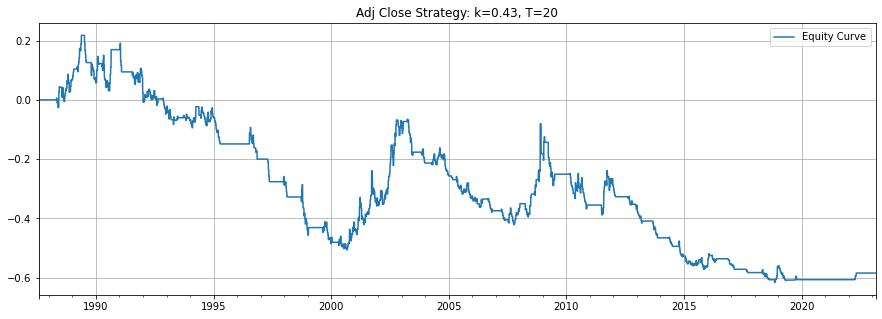

In [24]:
plt.figure(figsize = (15, 5))
d2 = daily[daily.index.year >= 2020]
(daily[mret].dropna()).plot()

plt.title("Adj Close Strategy:"+ " k=" + str(k)+", T="+str(T))



plt.legend(["Equity Curve", "Long Success", "Long Fail", "Short Success", "Short Fail"])

plt.grid()
#plt.xlim(["1/1/2019", "1/1/2022"])

In [25]:
daily

,Signal,Filter,Adj Close,30_signal,Returns,30_returns,30_success
1987-07-24,0.0,0.000000,309.269989,0,NaN,NaN,NaN
1987-07-25,0.0,0.000000,309.269989,0,0.0,0.000000,NaN
1987-07-26,0.0,0.000000,309.269989,0,0.0,0.000000,NaN
1987-07-27,0.0,0.000000,309.269989,0,0.0,0.000000,NaN
1987-07-28,0.0,0.000000,309.269989,0,0.0,0.000000,NaN
...,...,...,...,...,...,...,...
2023-02-19,0.0,4078.422119,4090.409912,0,0.0,-0.584615,NaN
2023-02-20,0.0,4078.422119,4090.409912,0,0.0,-0.584615,NaN
2023-02-21,0.0,4078.422119,4090.409912,0,0.0,-0.584615,NaN
2023-02-22,0.0,4078.422119,4090.409912,0,0.0,-0.584615,NaN


**b)**

**Total Rate of Return**

In [26]:
# Calculate cumulative returns of the strategy
cumulative_returns = (1 + daily["Returns"]).cumprod() - 1

# Calculate total rate of return
total_return = cumulative_returns[-1]

# Print the result
print("Total rate of return: " + str(total_return) + '%')

Total rate of return: 6.902535334572117%


**Annualized Return**

In [27]:
num_days = len(daily['Returns'])
total_return = np.exp(np.log(1 + daily['Returns']).sum()) - 1
annualized_return = (1 + total_return) ** (365/num_days) - 1
print('Annualized Return: ' + str(annualized_return) + '%')

Annualized Return: 0.05976228221937885%


**Return Only Hold Signal**

In [28]:
# filter for rows where a position is being held
position_days = daily[daily['Signal'] != 0]

# calculate daily returns on position days
position_days['Position Returns'] = position_days['Adj Close'].pct_change()

# calculate total return over the position days
total_return_position_days = (position_days['Position Returns'] + 1).cumprod()[-1] - 1

# calculate annualized return on position days
annualized_return_position_days = (1 + total_return_position_days) ** (252 / len(position_days)) - 1
print('Return Only on Days We Held Position: ', str(annualized_return_position_days) + '%')

Return Only on Days We Held Position:  2.448083077121641%


/var/folders/p_/qcpt_8pd5hlbv9w9cb71by8r0000gn/T/ipykernel_90315/20108045.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  position_days['Position Returns'] = position_days['Adj Close'].pct_change()


**Sharpe Ratio**

In [29]:
treasury = pd.read_csv('1-year-treasury-rate-yield-chart.csv', index_col=0, parse_dates=True).dropna()

In [30]:
treasury

,value
date,
1962-01-02,3.22
1962-01-03,3.24
1962-01-04,3.24
1962-01-05,3.26
1962-01-08,3.31
...,...
2022-12-16,4.61
2022-12-19,4.64
2022-12-20,4.64


In [31]:
daily['Risk Free'] = treasury
daily = daily.ffill()
daily['Returns Percent'] = daily['Returns']*100
daily['Risk Free Weekly'] = daily['Risk Free']/52
daily

,Signal,Filter,Adj Close,30_signal,Returns,30_returns,30_success,Risk Free,Returns Percent,Risk Free Weekly
1987-07-24,0.0,0.000000,309.269989,0,NaN,NaN,NaN,6.82,NaN,0.131154
1987-07-25,0.0,0.000000,309.269989,0,0.0,0.000000,NaN,6.82,0.0,0.131154
1987-07-26,0.0,0.000000,309.269989,0,0.0,0.000000,NaN,6.82,0.0,0.131154
1987-07-27,0.0,0.000000,309.269989,0,0.0,0.000000,NaN,6.84,0.0,0.131538
1987-07-28,0.0,0.000000,309.269989,0,0.0,0.000000,NaN,6.86,0.0,0.131923
...,...,...,...,...,...,...,...,...,...,...
2023-02-19,0.0,4078.422119,4090.409912,0,0.0,-0.584615,1.0,4.64,0.0,0.089231
2023-02-20,0.0,4078.422119,4090.409912,0,0.0,-0.584615,1.0,4.64,0.0,0.089231
2023-02-21,0.0,4078.422119,4090.409912,0,0.0,-0.584615,1.0,4.64,0.0,0.089231
2023-02-22,0.0,4078.422119,4090.409912,0,0.0,-0.584615,1.0,4.64,0.0,0.089231


In [32]:
excessReturns = daily['Returns Percent'] - daily['Risk Free Weekly']
sharpeRatio = excessReturns.mean() / excessReturns.std()
print('Sharpe Ratio: ' + str(sharpeRatio))

Sharpe Ratio: -0.04761918468290749


**Gini Coefficient**

In [33]:
def GINI_COEF(returns):
    # get the number of periods -> will allow us to calculate the areas
    periods = len(returns)
    
    # sort values and sum to calculate the lorenz curve
    LorenzCurve = np.cumsum(returns.sort_values( by = "Returns"))
    # start from 0
    LorenzCurve = pd.DataFrame({ 'Returns': [0]}).append(LorenzCurve)
    Line = LorenzCurve.copy()
    # Form the line that encompasses A and B
    Line["Returns"] = np.arange(0,1+1/periods, 1/periods)*max(LorenzCurve["Returns"])
    
    # calculate the area of A+B
    UpArea = 0
    for i in range(1,len(returns)):
        UpArea = UpArea + ((Line.iloc[i,:] - LorenzCurve.iloc[i,:] + Line.iloc[i-1,:] - LorenzCurve.iloc[i-1,:]) / 2)
    # calculate the area of A+B+C
    if min(LorenzCurve["Returns"]) < 0:
        AllArea = (np.abs(min(LorenzCurve["Returns"])) * periods) + ((max(LorenzCurve["Returns"]) * periods)/2)
    else:
        AllArea = ((max(LorenzCurve["Returns"]) * periods)/2)
    gini = UpArea / AllArea
    return(gini[0])

In [34]:
GINI_COEF(daily)

/var/folders/p_/qcpt_8pd5hlbv9w9cb71by8r0000gn/T/ipykernel_90315/2616558606.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  LorenzCurve = pd.DataFrame({ 'Returns': [0]}).append(LorenzCurve)


0.9616536591650358

# 2

**a)**

Silicon Valley Bank (SVB) declared bankruptcy on March 10th, 2023. The FDIC took control of the bank through the Deposit Insurance National Bank of Santa Clara.

**b)**

I believe the Euro will get stronger as the USD gets weaker. This bank failing will most likely have strong economic implications causing a downturn in the US economy. As a result, the Euro will become stronger. The 10 year rates will most likely drop potentially causing an inverted yield curve. This invertion would signal the US is facing a recession. The SP500 will probably drop as well. Many tech companies had their investments with SVB. While not all the tech companies may be in the SP500, the economy as a whole will take a hit from this bank failure. Investors will be spooked and the SP500 will drop.

**c)**

Eur/USD increased from 1.0550 to 1.0585
Interest Rates dropped from 3.9230% to 3.6950%
SP500 dropped 3918.32 to 3861.59

**d)**

The US economy had an alright start to the year despite the high inflation and rising interest rates from the Fed trying to cool the economy. Manufacturing and housing are feeling the impact of the Fed and inflation. SVB collapse is sending major shockwaves throughout the economy. Many people are afraid that other banks may fail as this collapse is the second biggest bank failure in US history. The service sector is still strong with higher wages being offered to job seekers and the labor force participation rate is high. The wage growth may be coming to an end. SVB still has shocked the economy and the Fed has to decide how much to raise interest rates. The decision could be to continue to cool the economy and inflation, or mitigate economic damages and fears SVB may cause.